In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Reshape, Conv1D, MaxPooling1D, Flatten, Dense, Dropout,Lambda
from keras.utils import to_categorical
import csv

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/mhealth_full.csv', quoting=csv.QUOTE_NONE, on_bad_lines='skip')

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from numpy import array
from keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold

In [ ]:
# Resample activity 0 (null class) to 30720 observations per EDA phase
data_activity_0 = data[data['activity'] == 0]
data_activity_else = data[data['activity'] != 0]

data_activity_0 = data_activity_0.sample(n=30720, random_state=1)
data = pd.concat([data_activity_0, data_activity_else])


In [ ]:
# Split data between predictors and output variable
X = data.drop(['activity', 'subject'], axis=1)
y = data['activity']
# Scale full set of predictors
X_scaled = StandardScaler().fit_transform(X)
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

In [ ]:
# Merge train and test X/y data to apply sequence transformation function
y_train = to_categorical(np.array(y_train))
y_test= to_categorical(np.array(y_test))

In [ ]:
!pip install keras_spiking

In [ ]:
import keras_spiking

In [ ]:
model1 = Sequential()
model1.add(Reshape(target_shape=(X_train.shape[1], 1), input_shape=(X_train.shape[1],)))
model1.add(Conv1D(filters=64, kernel_size=3, padding='same'))
model1.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
model1.add(Dropout(0.1))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(13, activation='softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model1.fit(X_train, y_train, epochs=200, batch_size=2000, validation_data=(X_test, y_test))

Epoch 1/200
141/141 [==============================] - 7s 16ms/step - loss: 0.7491 - accuracy: 0.7645 - val_loss: 0.3631 - val_accuracy: 0.8850
Epoch 2/200
141/141 [==============================] - 2s 11ms/step - loss: 0.3398 - accuracy: 0.8938 - val_loss: 0.2728 - val_accuracy: 0.9175
Epoch 3/200
141/141 [==============================] - 2s 11ms/step - loss: 0.2760 - accuracy: 0.9160 - val_loss: 0.2283 - val_accuracy: 0.9342
Epoch 4/200
141/141 [==============================] - 1s 10ms/step - loss: 0.2431 - accuracy: 0.9279 - val_loss: 0.2100 - val_accuracy: 0.9388
Epoch 5/200
141/141 [==============================] - 1s 10ms/step - loss: 0.2236 - accuracy: 0.9344 - val_loss: 0.1973 - val_accuracy: 0.9446
Epoch 6/200
141/141 [==============================] - 1s 9ms/step - loss: 0.2075 - accuracy: 0.9399 - val_loss: 0.1794 - val_accuracy: 0.9501
Epoch 7/200
141/141 [==============================] - 1s 9ms/step - loss: 0.2010 - accuracy: 0.9419 - val_loss: 0.1757 - val_accuracy: 0

In [ ]:
# Build and compile the model (same as before)
model = Sequential()
model.add(Reshape(target_shape=(X_train.shape[1], 1), input_shape=(X_train.shape[1],)))
model.add(Conv1D(filters=64, kernel_size=3, padding='same'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(keras_spiking.SpikingActivation("relu", dt=1))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(13, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, epochs=500, batch_size=2000, validation_data=(X_test, y_test))

Epoch 1/500
141/141 [==============================] - 5s 24ms/step - loss: 0.8259 - accuracy: 0.7283 - val_loss: 0.3961 - val_accuracy: 0.8718
Epoch 2/500
141/141 [==============================] - 6s 40ms/step - loss: 0.3589 - accuracy: 0.8853 - val_loss: 0.2847 - val_accuracy: 0.9125
Epoch 3/500
141/141 [==============================] - 3s 21ms/step - loss: 0.2808 - accuracy: 0.9136 - val_loss: 0.2306 - val_accuracy: 0.9333
Epoch 4/500
141/141 [==============================] - 3s 20ms/step - loss: 0.2460 - accuracy: 0.9262 - val_loss: 0.2179 - val_accuracy: 0.9374
Epoch 5/500
141/141 [==============================] - 3s 20ms/step - loss: 0.2244 - accuracy: 0.9339 - val_loss: 0.1902 - val_accuracy: 0.9457
Epoch 6/500
141/141 [==============================] - 4s 31ms/step - loss: 0.2077 - accuracy: 0.9397 - val_loss: 0.1833 - val_accuracy: 0.9495
Epoch 7/500
141/141 [==============================] - 5s 32ms/step - loss: 0.1943 - accuracy: 0.9439 - val_loss: 0.1740 - val_accuracy:

In [ ]:
np.max(history.history['val_accuracy'])

0.9785513281822205

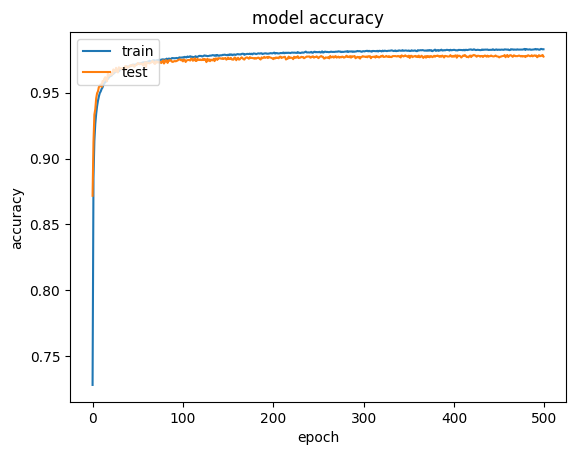

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.load_weights("model_weights.h5")/2789

In [ ]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=aae42dd7a8d8c1bc29c66a9fd6866e20dd7d2cff3d3f01be928b168513cc675a
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
import IPython
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.metrics import accuracy_score


# Define a custom scoring function for accuracy in multi-class classification
def custom_accuracy_score(estimator, X, y_true):
    y_pred = estimator.predict(X)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_true, axis=1)
    return accuracy_score(y_true_classes, y_pred_classes)

# Now, let's perform permutation importance using eli5
perm = PermutationImportance(model, scoring=custom_accuracy_score, random_state=1).fit(X_test[:400], y_test[:400])


eli5.show_weights(perm, feature_names=X.columns.tolist(),top=21)

13/13 [==============================] - 8s 10ms/step


KeyboardInterrupt: ignored

In [ ]:
!pip install pdfkit
!apt-get update
!apt-get install -y wkhtmltopdf

import pdfkit
from IPython.display import HTML


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [631 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [1,487 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,514 kB]
Get:13 http://archive.ubu

In [ ]:
html_content = eli5.show_weights(perm, feature_names=X.columns.tolist(),top=21)

In [ ]:
print(html_content)

In [ ]:
from IPython.core.display import HTML

# Your HTML content with updated colors
html_content = """
<style>
    table.eli5-weights {
        width: 40%;
        border-collapse: collapse;
        margin-top: -.5em;
        table-layout: fixed;
    }

    table.eli5-weights th, table.eli5-weights td {
        padding: 0.3em;
        border: 1px solid #ddd; /* Add border to cells */
    }

    table.eli5-weights th {
        text-align: left;
        background-color: #f2f2f2;
    }

    table.eli5-weights tr:hover {
        filter: brightness(85%);
    }
</style>

<table class="eli5-weights eli5-feature-importances">
    <thead>
        <tr>
            <th>Feature</th>
            <th>Weight</th>
        </tr>
    </thead>
    <tbody>
        <tr style="background-color: #FF4800; color: #ffffff;">
            <td>gyr_rw_x</td>
            <td style="text-align: right;">0.3045 &plusmn; 0.0472</td>
        </tr>
        <tr style="background-color: #FF6224; color: #ffffff;">
            <td>gyr_la_z</td>
            <td style="text-align: right;">0.2920 &plusmn; 0.0185</td>
        </tr>
        <tr style="background-color: #FF723B; color: #ffffff;">
            <td>gyr_la_x</td>
            <td style="text-align: right;">0.2770 &plusmn; 0.0166</td>
        </tr>
        <tr style="background-color: #FF8454; color: #ffffff;">
            <td>gyr_rw_y</td>
            <td style="text-align: right;">0.2670 &plusmn; 0.0562</td>
        </tr>
        <tr style="background-color: #FF966E; color: #ffffff;">
            <td>gyr_rw_z</td>
            <td style="text-align: right;">0.2465 &plusmn; 0.0356</td>
        </tr>
        <tr style="background-color: #FF9973; color: #ffffff;">
            <td>gyr_la_y</td>
            <td style="text-align: right;">0.2200 &plusmn; 0.0114</td>
        </tr>
        <tr style="background-color: #FFA07D; color: #ffffff;">
            <td>acc_ch_z</td>
            <td style="text-align: right;">0.2015 &plusmn; 0.0229</td>
        </tr>
        <tr style="background-color: #FFA787; color: #ffffff;">
            <td>acc_ch_x</td>
            <td style="text-align: right;">0.1755 &plusmn; 0.0174</td>
        </tr>
        <tr style="background-color: #FFA98A; color: #ffffff;">
            <td>acc_rw_y</td>
            <td style="text-align: right;">0.1705 &plusmn; 0.0400</td>
        </tr>
        <tr style="background-color: #FFAB8C; color: #ffffff;">
            <td>acc_ch_y</td>
            <td style="text-align: right;">0.1485 &plusmn; 0.0280</td>
        </tr>
        <tr style="background-color: #FFA98A; color: #ffffff;">
            <td>acc_rw_z</td>
            <td style="text-align: right;">0.1385 &plusmn; 0.0306</td>
        </tr>
        <tr style="background-color: #FFAD8F; color: #ffffff;">
            <td>mag_la_x</td>
            <td style="text-align: right;">0.1365 &plusmn; 0.0447</td>
        </tr>
        <tr style="background-color: #FFAD8F; color: #ffffff;">
            <td>acc_la_y</td>
            <td style="text-align: right;">0.1255 &plusmn; 0.0273</td>
        </tr>
        <tr style="background-color: #fcb597; color: #ffffff;">
            <td>acc_la_z</td>
            <td style="text-align: right;">0.1030 &plusmn; 0.0124</td>
        </tr>
        <tr style="background-color: #fcb597; color: #ffffff;">
            <td>acc_rw_x</td>
            <td style="text-align: right;">0.1030 &plusmn; 0.0280</td>
        </tr>
        <tr style="background-color: #fcb597; color: #ffffff;">
            <td>mag_rw_x</td>
            <td style="text-align: right;">0.0875 &plusmn; 0.0235</td>
        </tr>
        <tr style="background-color: #fcb99d; color: #ffffff;">
            <td>acc_la_x</td>
            <td style="text-align: right;">0.0835 &plusmn; 0.0201</td>
        </tr>
        <tr style="background-color: #fabca2; color: #ffffff;">
            <td>mag_rw_y</td>
            <td style="text-align: right;">0.0820 &plusmn; 0.0180</td>
        </tr>
        <tr style="background-color: #fabca2; color: #ffffff;">
            <td>mag_rw_z</td>
            <td style="text-align: right;">0.0690 &plusmn; 0.0269</td>
        </tr>
        <tr style="background-color: #fac9b4; color: #ffffff;">
            <td>mag_la_y</td>
            <td style="text-align: right;">0.0685 &plusmn; 0.0227</td>
        </tr>
        <tr style="background-color: #fac9b4; color: #ffffff;">
            <td>mag_la_z</td>
            <td style="text-align: right;">0.0555 &plusmn; 0.0128</td>
        </tr>
    </tbody>
</table>



"""

# Create and display the HTML object
html_object = HTML(html_content)
html_object


Feature,Weight
gyr_rw_x,0.3045 ± 0.0472
gyr_la_z,0.2920 ± 0.0185
gyr_la_x,0.2770 ± 0.0166
gyr_rw_y,0.2670 ± 0.0562
gyr_rw_z,0.2465 ± 0.0356
gyr_la_y,0.2200 ± 0.0114
acc_ch_z,0.2015 ± 0.0229
acc_ch_x,0.1755 ± 0.0174
acc_rw_y,0.1705 ± 0.0400
acc_ch_y,0.1485 ± 0.0280


In [ ]:
# Convert the HTML content to a PDF file using pdfkit.
pdfkit.from_string(html_object.data, "/content/output.pdf")

# Download the generated PDF file.
from google.colab import files
files.download('/content/output.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 6.0 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:

sample=X_test[:200]
explainer = shap.KernelExplainer(model,sample)
shap_values = explainer.shap_values(sample)


  0%|          | 0/200 [00:00<?, ?it/s]

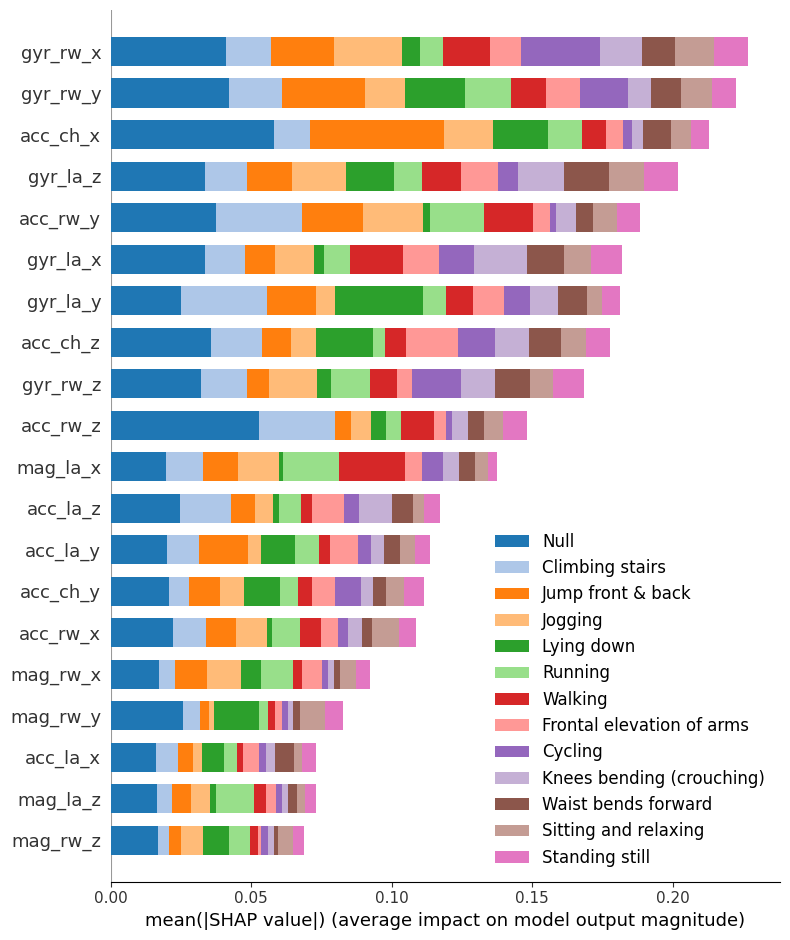

In [ ]:
plt.figure()
cmap = plt.get_cmap("tab20")
shap.summary_plot(shap_values, X_test[:1000], plot_type="bar",color=cmap, class_names=['Null','Standing still','Sitting and relaxing','Lying down','Walking','Climbing stairs','Waist bends forward','Frontal elevation of arms','Knees bending (crouching)','Cycling','Jogging','Running','Jump front & back'], feature_names = X.columns,show=False)
plt.savefig("a.pdf",dpi=150)

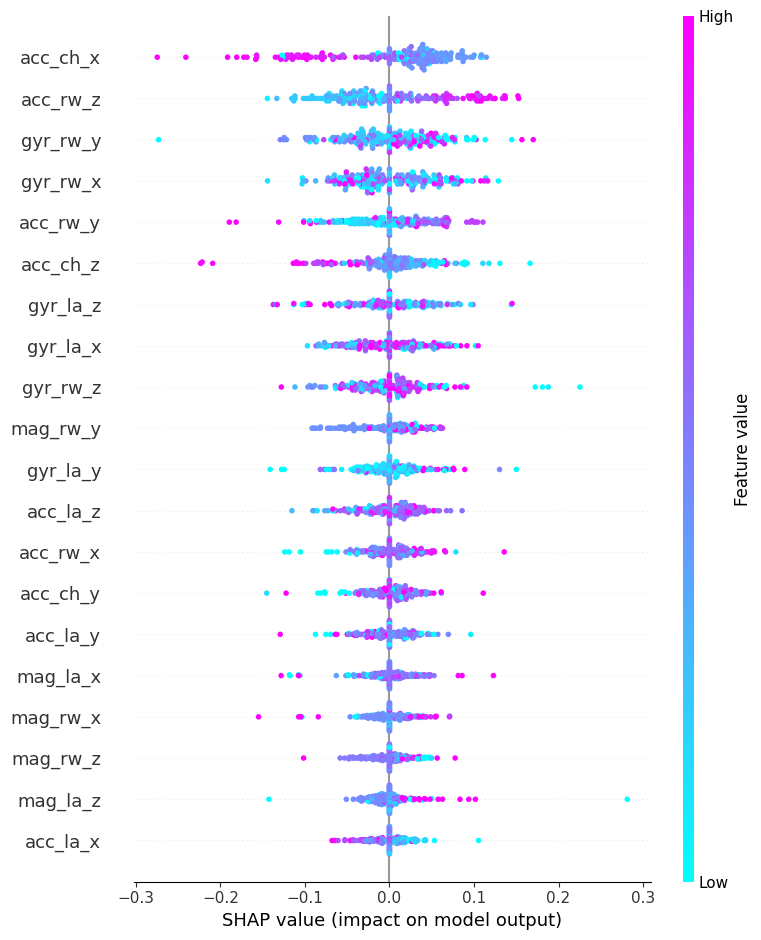

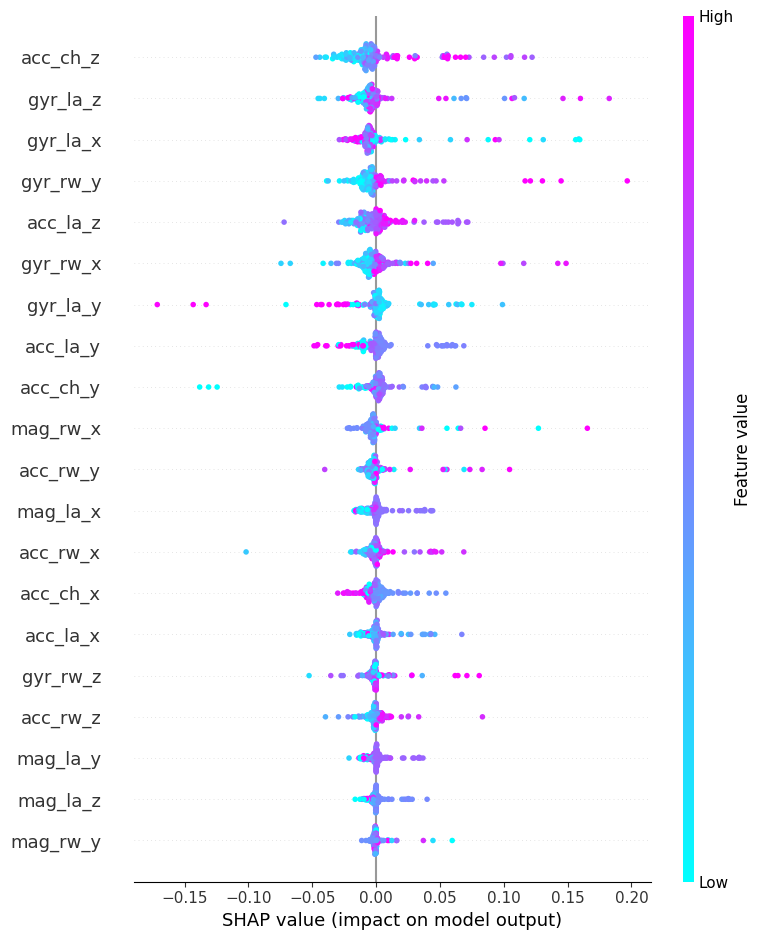

In [ ]:
plt.figure()
cmap = plt.get_cmap("cool")
shap.summary_plot(shap_values[0],sample, feature_names = X.columns,show=False)
for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(cmap)
plt.savefig("b.pdf",dpi=150)

plt.figure()
cmap = plt.get_cmap("cool")
shap.summary_plot(shap_values[7], sample, feature_names = X.columns,show=False)
for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(cmap)
plt.savefig("c.pdf",dpi=150)

In [ ]:
shap.initjs()
i=10
fp1 = shap.force_plot(explainer.expected_value[0],shap_values[0][i], X_train[i], feature_names = X.columns, plot_cmap="GnPR")
# Save the plot as a PDF
plt.figure()
shap.save_html('fp1.html', fp1)
i=5
fp2 = shap.force_plot(explainer.expected_value[0],shap_values[0][i], X_train[i], feature_names = X.columns, plot_cmap="GnPR")
# Save the plot as a PDF
plt.figure()
shap.save_html('fp2.html', fp2)


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
!pip install scikeras
from scikeras.wrappers import KerasClassifier

In [ ]:
kr = KerasClassifier(build_fn=model, loss='categorical_crossentropy')
kr.fit(X_train,y_train, epochs=5,batch_size=2000)

In [ ]:
from sklearn.inspection import (partial_dependence,
                                PartialDependenceDisplay)
import matplotlib.pyplot as plt


In [ ]:
X.columns

In [ ]:
PartialDependenceDisplay.from_estimator(kr,X_test[:1000], target=9,features = [(15)],feature_names=X.columns,kind='both', centered=True)
plt.savefig('gyr_rw_x.pdf')

In [ ]:
PartialDependenceDisplay.from_estimator(kr,X_test[:1000], target=7,features = [(8)],feature_names=X.columns,kind='both', centered=True)
plt.savefig('gyr_la_z.pdf')

In [ ]:
PartialDependenceDisplay.from_estimator(kr,X_test[:1000], target=11,features = [(10)],feature_names=X.columns,kind='both', centered=True)
plt.savefig('mag_la_y.pdf')

In [ ]:
PartialDependenceDisplay.from_estimator(kr,X_test[:1000], target=11,features = [(11)],feature_names=X.columns,kind='both', centered=True)
plt.savefig('mag_la_z.pdf')

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
# SVM
svm_classifier = SVC(verbose=1)

# Naive Bayes
nb_classifier = GaussianNB()

# Logistic Regression
lr_classifier = LogisticRegression(verbose=1,max_iter=1000)



In [ ]:

# Random Forest
rf_classifier = RandomForestClassifier(verbose=1,n_estimators=20,max_features=0.2)


In [ ]:
# SVM
svm_classifier.fit(X_train, np.argmax(y_train, axis=1))

# Naive Bayes
nb_classifier.fit(X_train, np.argmax(y_train, axis=1))

# Logistic Regression
lr_classifier.fit(X_train, np.argmax(y_train, axis=1))


[LibSVM]

LogisticRegression(max_iter=1000, verbose=1)

In [ ]:
# Random Forest
rf_classifier.fit(X_train, np.argmax(y_train, axis=1))

RandomForestClassifier(max_features=0.2, n_estimators=20, verbose=1)

In [ ]:
# Load SVM model
svm_classifier = joblib.load('svm_model.joblib')

# Load Naive Bayes model
nb_classifier = joblib.load('nb_model.joblib')

# Load Logistic Regression model
lr_classifier = joblib.load('lr_model.joblib')

# Load Random Forest model
rf_classifier = joblib.load('rf_model.joblib')

In [ ]:
sample = np.random.choice(X_test,10000)

In [ ]:
# SVM

svm_pred = svm_classifier.predict(X_test[:10000])


In [ ]:
# Naive Bayes
nb_pred = nb_classifier.predict(X_test[:10000])


In [ ]:

# Logistic Regression
lr_pred = lr_classifier.predict(X_test[:10000])


In [ ]:

# Random Forest
rf_pred = rf_classifier.predict(X_test[:10000])


In [ ]:
# Keras Classifier (your original model)
kr_pred = model.predict(X_test[:10000])


313/313 [==============================] - 1s 3ms/step


In [ ]:
cnn_pred = model1.predict(X_test[:10000])

313/313 [==============================] - 1s 2ms/step


In [ ]:

# Define a function for evaluation
def evaluate_performance(y_true, y_pred, algo_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Metrics for {algo_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print()

# Evaluate Keras Classifier
evaluate_performance(np.argmax(y_test[:10000], axis=1), np.argmax(kr_pred, axis=1), "Spiking CNN")
# Evaluate other classifiers
evaluate_performance(np.argmax(y_test[:10000], axis=1), svm_pred, "SVM")
evaluate_performance(np.argmax(y_test[:10000], axis=1), nb_pred, "Naive Bayes")
evaluate_performance(np.argmax(y_test[:10000], axis=1), lr_pred, "Logistic Regression")
evaluate_performance(np.argmax(y_test[:10000], axis=1), rf_pred, "Random Forest")
evaluate_performance(np.argmax(y_test[:10000], axis=1), np.argmax(cnn_pred, axis=1), "CNN")


Metrics for Spiking CNN:
Accuracy: 0.9782
Precision: 0.9779
Recall: 0.9782
F1 Score: 0.9776

Metrics for SVM:
Accuracy: 0.9623
Precision: 0.9617
Recall: 0.9623
F1 Score: 0.9600

Metrics for Naive Bayes:
Accuracy: 0.7850
Precision: 0.7741
Recall: 0.7850
F1 Score: 0.7720

Metrics for Logistic Regression:
Accuracy: 0.6549
Precision: 0.6293
Recall: 0.6549
F1 Score: 0.6334

Metrics for Random Forest:
Accuracy: 0.9776
Precision: 0.9775
Recall: 0.9776
F1 Score: 0.9768

Metrics for CNN:
Accuracy: 0.9774
Precision: 0.9773
Recall: 0.9774
F1 Score: 0.9766

